#                           Ajustamento Exponencial:Decomposição pelo Modelo Classico

## Suavização Exponencial Simples
### sem tendência e sazonalidade, parâmetro α


In [1]:
#Pacotes
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Suavização Exponencial Simples (EXPONENTIAL SMOOTHING)

### Sendo possível descrever por meio do modelo aditivo com nível constante e sem sazonalidade.A suaviazação ocorre pelo parâmetro alfa entre 0 e 1. Sendo, 0 pouco peso nas observações mais recentes ao fazer previsões de valores futuros. 

## Base de Dados:

In [2]:
#Dados bruto
dados=pd.read_csv("precogas.csv",sep=';',decimal=',',parse_dates=['Datas'])
dados = dados.set_index('Datas')
dados


,Periodos,Preco
Datas,,
jan/17,1,799.71
fev/17,2,793.85
mar/17,3,804.81
abr/17,4,791.82
mai/17,5,772.03
jun/17,6,783.66
jul/17,7,795.70
ago/17,8,801.73
set/17,9,800.80


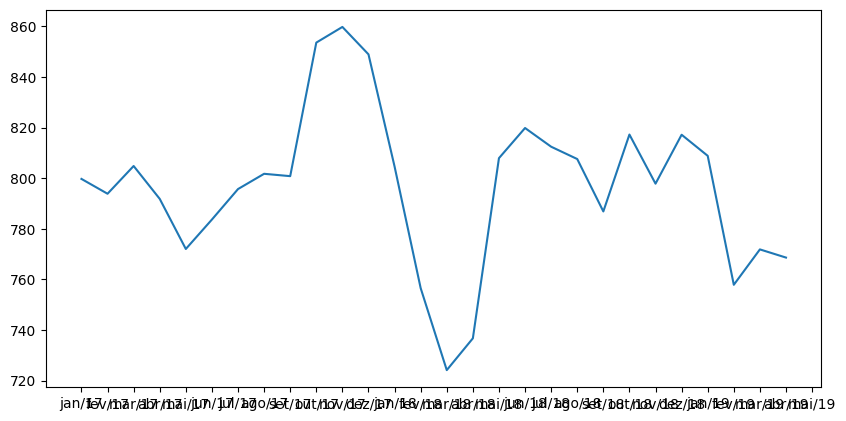

In [3]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(dados.Preco);

## Suavização Exponencial Simples

In [4]:
#Formula
modelo_z = np.poly1d(np.polyfit(np.arange(0,28),dados['Preco'].dropna(),2))
modelo_z

poly1d([-9.40094101e-02,  2.01847575e+00,  7.92531835e+02])

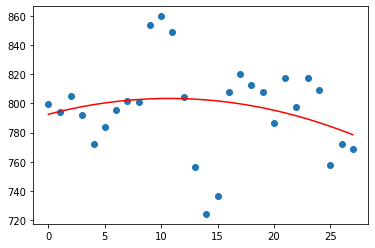

In [5]:
#Plotar o grafico
y2 = modelo_z(np.arange(0,28))
plt.scatter(np.arange(0,28),dados['Preco'].dropna())
plt.plot(np.arange(0,28),y2,color='red')

In [6]:
#Coeficientes
modelo_z.coef

array([-9.40094101e-02,  2.01847575e+00,  7.92531835e+02])

In [7]:
#Previsao
modelo_z.coef[0]
modelo_z.coef[1]
modelo_z.coef[2]
dados['Prev_Exponencial'] = (((modelo_z.coef[0]*dados['Periodos']**2)+modelo_z.coef[1]*dados['Periodos']) +modelo_z.coef[2])

In [8]:
dados.tail()

,Periodos,Preco,Prev_Exponencial
Datas,,,
jan/19,25,808.83,784.237847
fev/19,26,757.88,781.461843
mar/19,27,771.86,778.497820
abr/19,28,768.63,775.345778
mai/19,29,NaN,772.005718


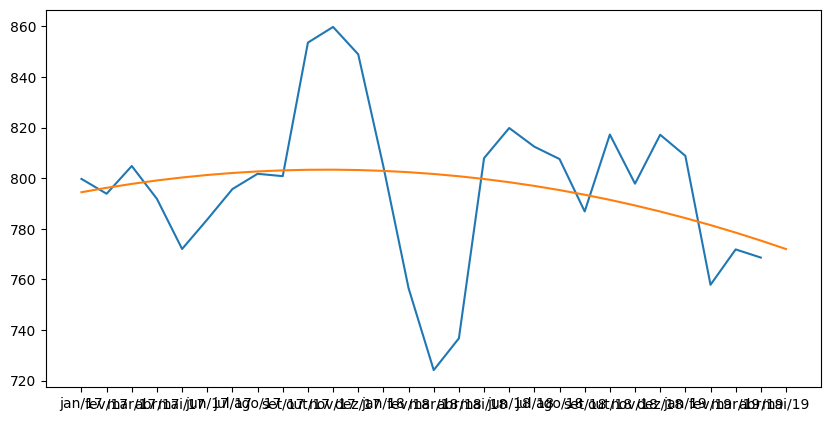

In [9]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(dados.Preco);
plt.plot(dados.Prev_Exponencial)

## Ajuste Exponencial Simples: (Alpha)

### Obtenção de tendencia da serie por ajuste Exponencial , Necessita de uma constante de Suavização

### Valor de W(suavização) =  Quanto mais proximo de 1 o valor de W mais peso será dado aos dados mais recentes da serie

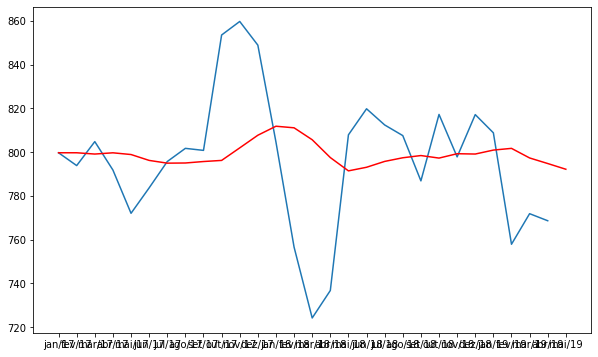

In [10]:
#Definir o valor da constante W (Obs: o 1° valor do ajuste exponencial é o 1° valor do registro da serie)
dados['Ajust_Exponencial0.1'] =dados['Preco'] # Somente para o 1° valor da serie se repetir no 1° registro

w = 0.1 # Valor da constante
g = []
resultado = dados.iloc[0:1,1].values #1° valor de registro

a = 0
b = 1
f = 0
for i in range(28):
    j=w * dados.iloc[a:b,1]+(1-w)*resultado #Calculo do ajuste exponencial
    g.append(j)
    resultado = g[f].values 
    f+=1
    a+=1
    b+=1
c=0
k=[]
for i in range(28):
    p = g[c][0]
    k.append(p)
    c+=1
    
    
ajust_exp = pd.DataFrame(k)#Criar um dataframe
dados.iloc[1:,3] = ajust_exp#Criar uma coluna do ajuste exponencial simples

#Grafico 
plt.figure(figsize=(10, 6))
plt.plot(dados.Preco)
plt.plot(dados.iloc[:,3],color='red')

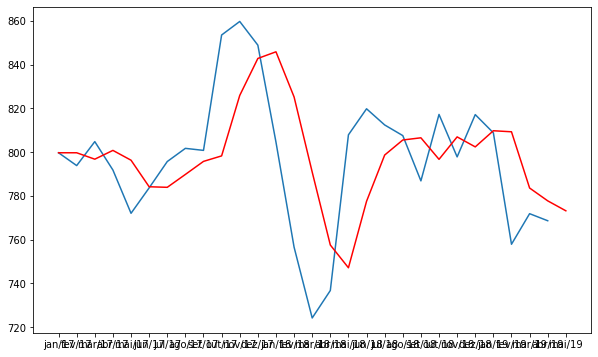

In [11]:
#Definir o valor da constante W (Obs: o 1° valor do ajuste exponencial é o 1° valor do registro da serie)
dados['Ajust_Exponencial0.5'] =dados['Preco'] # Somente para o 1° valor da serie se repetir no 1° registro

w = 0.5 # Valor da constante
g = []
resultado = dados.iloc[0:1,1].values #1° valor de registro

a = 0
b = 1
f = 0
for i in range(28):
    j=w * dados.iloc[a:b,1]+(1-w)*resultado #Calculo do ajuste exponencial
    g.append(j)
    resultado = g[f].values 
    f+=1
    a+=1
    b+=1
c=0
k=[]
for i in range(28):
    p = g[c][0]
    k.append(p)
    c+=1
    
    
ajust_exp = pd.DataFrame(k)#Criar um dataframe
dados.iloc[1:,4] = ajust_exp#Criar uma coluna do ajuste exponencial simples

#Grafico 
plt.figure(figsize=(10, 6))
plt.plot(dados.Preco)
plt.plot(dados.iloc[:,4],color='red')

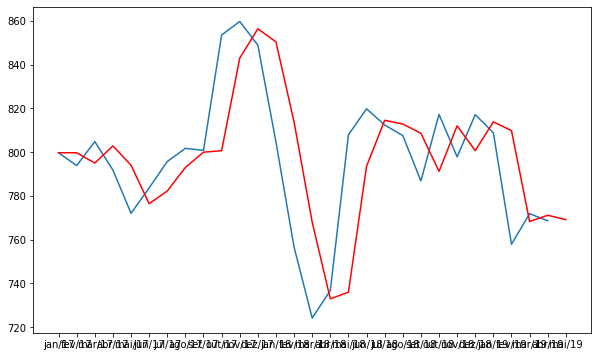

In [12]:
#Definir o valor da constante W (Obs: o 1° valor do ajuste exponencial é o 1° valor do registro da serie)
dados['Ajust_Exponencial0.8'] =dados['Preco'] # Somente para o 1° valor da serie se repetir no 1° registro

w = 0.8 # Valor da constante
g = []
resultado = dados.iloc[0:1,1].values #1° valor de registro

a = 0
b = 1
f = 0
for i in range(28):
    j=w * dados.iloc[a:b,1]+(1-w)*resultado #Calculo do ajuste exponencial
    g.append(j)
    resultado = g[f].values 
    f+=1
    a+=1
    b+=1
c=0
k=[]
for i in range(28):
    p = g[c][0]
    k.append(p)
    c+=1
    
    
ajust_exp = pd.DataFrame(k)#Criar um dataframe
dados.iloc[1:,5] = ajust_exp#Criar uma coluna do ajuste exponencial simples

#Grafico 
plt.figure(figsize=(10, 6))
plt.plot(dados.Preco)
plt.plot(dados.iloc[:,5],color='red')

In [13]:
dados

,Periodos,Preco,Prev_Exponencial,Ajust_Exponencial0.1,Ajust_Exponencial0.5,Ajust_Exponencial0.8
Datas,,,,,,
jan/17,1,799.71,794.456301,799.710000,799.710000,799.710000
fev/17,2,793.85,796.192749,799.710000,799.710000,799.710000
mar/17,3,804.81,797.741178,799.124000,796.780000,795.022000
abr/17,4,791.82,799.101587,799.692600,800.795000,802.852400
mai/17,5,772.03,800.273978,798.905340,796.307500,794.026480
jun/17,6,783.66,801.258351,796.217806,784.168750,776.429296
jul/17,7,795.70,802.054704,794.962025,783.914375,782.213859
ago/17,8,801.73,802.663039,795.035823,789.807188,793.002772
set/17,9,800.80,803.083354,795.705241,795.768594,799.984554


# Metricas de erro:

## MAE

In [14]:
MAE = pd.DataFrame(dados.Preco - dados['Ajust_Exponencial0.1'],columns=['erro_0.1'])
MAE['erro_0.1'] = abs(MAE)
MAE['erro_0.5'] = pd.DataFrame(abs(dados.Preco - dados['Ajust_Exponencial0.5']))
MAE['erro_0.8'] = pd.DataFrame(abs(dados.Preco - dados['Ajust_Exponencial0.8']))
MAE1 = MAE.iloc[1:28,:] # Excluindo o primeiro e o ultimo valor 

In [15]:
print(f'0.1  = {MAE1.iloc[:,0].mean()}')
print(f'0.5  = {MAE1.iloc[:,1].mean()}')
print(f'0.8  = {MAE1.iloc[:,2].mean()}')

0.1  = 24.305052411898984
0.5  = 23.157689187537716
0.8  = 20.51814674220853


# Previsao de 1 periodo a frente

In [16]:
dados.tail(1)

,Periodos,Preco,Prev_Exponencial,Ajust_Exponencial0.1,Ajust_Exponencial0.5,Ajust_Exponencial0.8
Datas,,,,,,
mai/19,29,NaN,772.005718,792.175751,773.178184,769.132451


## Encontrar o melhor valor de alpha com o MAE mais baixo possivel

In [46]:
m = MAE1.iloc[:,2].mean() # Usando o MAE de 0.8 
a = 0.8
while m > 21: 
    m = m - sum(0.000001* 2*(m*MAE1.iloc[:,2]+ a - dados.iloc[1:28,1])*MAE1.iloc[:,2])
    a = a - sum(0.000001* 2*(m*MAE1.iloc[:,2]+ a - dados.iloc[1:28,1]))
    y= m*MAE1.iloc[:,2] + a
    m = sum((y - dados.iloc[1:28,1])**2)
print(f'Alpha= {a}\nMAE= {m}') 

Alpha= 0.8
MAE= 20.51814674220853


## Erro quando eu quero encontrar um valor de MAE < 20

In [53]:
m = MAE1.iloc[:,2].mean() # Usando o MAE de 0.8 
a = 0.8
while m > 20: 
    m = m - sum(0.000001* 2*(m*MAE1.iloc[:,2]+ a - dados.iloc[1:28,1])*MAE1.iloc[:,2])
    a = a - sum(0.000001* 2*(m*MAE1.iloc[:,2]+ a - dados.iloc[1:28,1]))
    y= m*MAE1.iloc[:,2] + a
    m = sum((y - dados.iloc[1:28,1])**2)
print(f'Alpha= {a}\nMAE= {m}') 

Alpha= nan
MAE= nan
